
# 🎓 College Event Feedback Analysis
This notebook analyzes student feedback from a recent course/event using numeric ratings.


In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/student_feedback.csv')

# Preview data
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [3]:

# Rename columns for easier reference
df.columns = [
    "Index", "Student_ID", "Subject_Expertise", "Concept_Clarity", "Presentations",
    "Assignment_Difficulty", "Doubt_Solving", "Course_Structure",
    "Student_Support", "Course_Recommendation"
]

# Drop index column
df.drop(columns=["Index"], inplace=True)


In [4]:

# Summary statistics
df.describe()


,Student_ID,Subject_Expertise,Concept_Clarity,Presentations,Assignment_Difficulty,Doubt_Solving,Course_Structure,Student_Support,Course_Recommendation
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


/tmp/ipython-input-6-1960653102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.mean().reset_index(), x="index", y=0, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


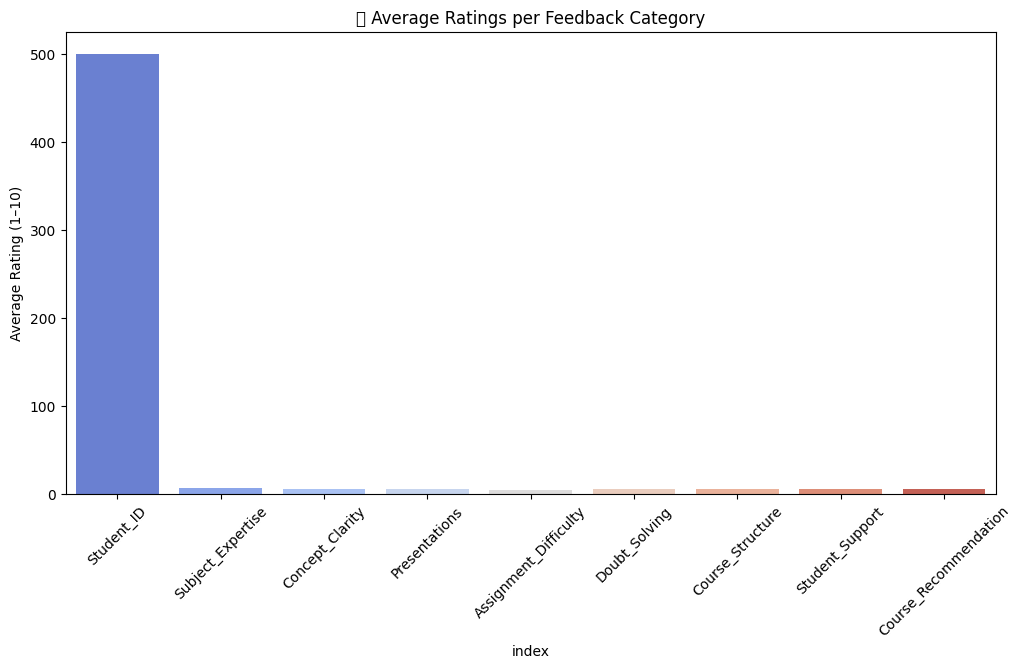

In [6]:

# Average rating for each aspect
plt.figure(figsize=(12,6))
sns.barplot(data=df.mean().reset_index(), x="index", y=0, palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Average Rating (1–10)")
plt.title("🔍 Average Ratings per Feedback Category")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


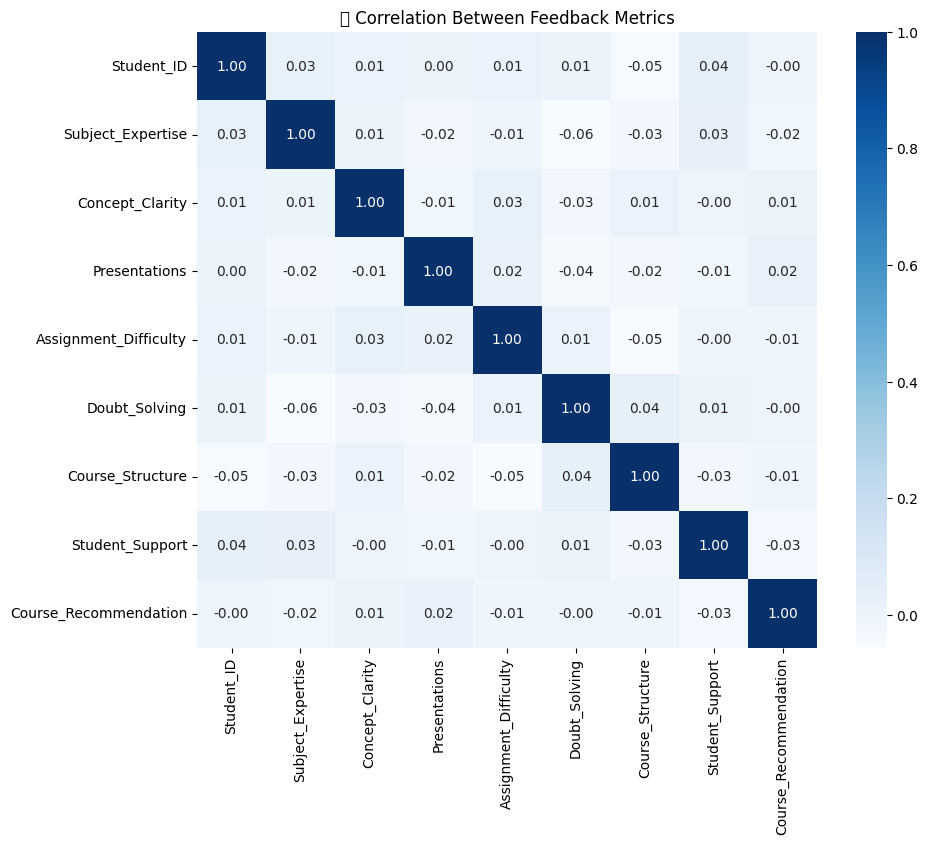

In [5]:

# Correlation heatmap between all rating aspects
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("📊 Correlation Between Feedback Metrics")
plt.show()


In [7]:

# Highest and lowest rated aspects
sorted_avgs = df.mean().sort_values(ascending=False)
sorted_avgs


,0
Student_ID,500.000000
Subject_Expertise,7.497502
Concept_Clarity,6.081918
Presentations,5.942058
Student_Support,5.662338
Course_Structure,5.636364
Course_Recommendation,5.598402
Doubt_Solving,5.474525
Assignment_Difficulty,5.430569


## 📌 Distribution Plots
Goal: Show how each rating is spread out (not just averages)  

Use: Identify skewed ratings (e.g., most students rate 8–10?)

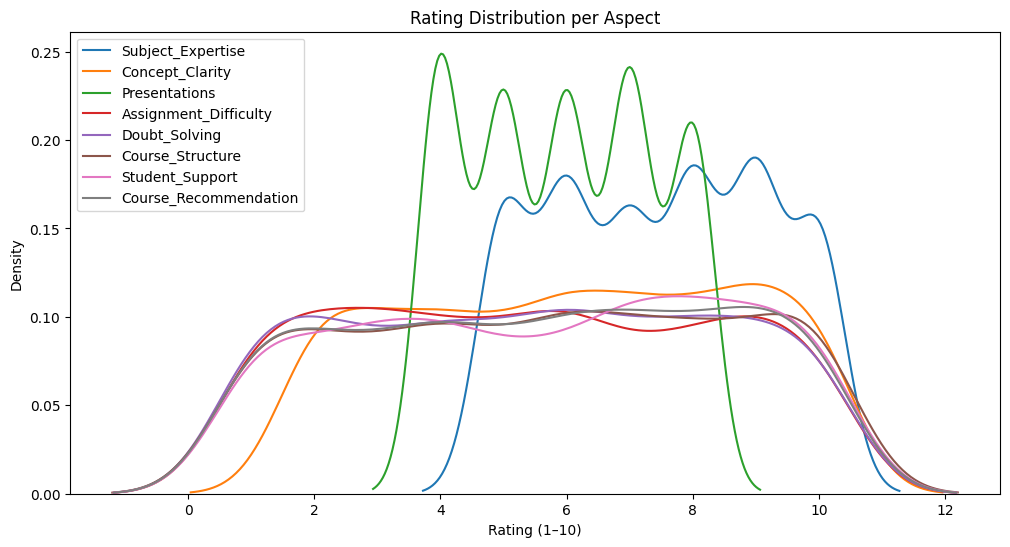

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for column in df.columns[1:]:
    sns.kdeplot(df[column], label=column)
plt.title("Rating Distribution per Aspect")
plt.xlabel("Rating (1–10)")
plt.legend()
plt.show()


## 🧮 Box Plot
Goal: Show rating spread and detect outliers for each aspect

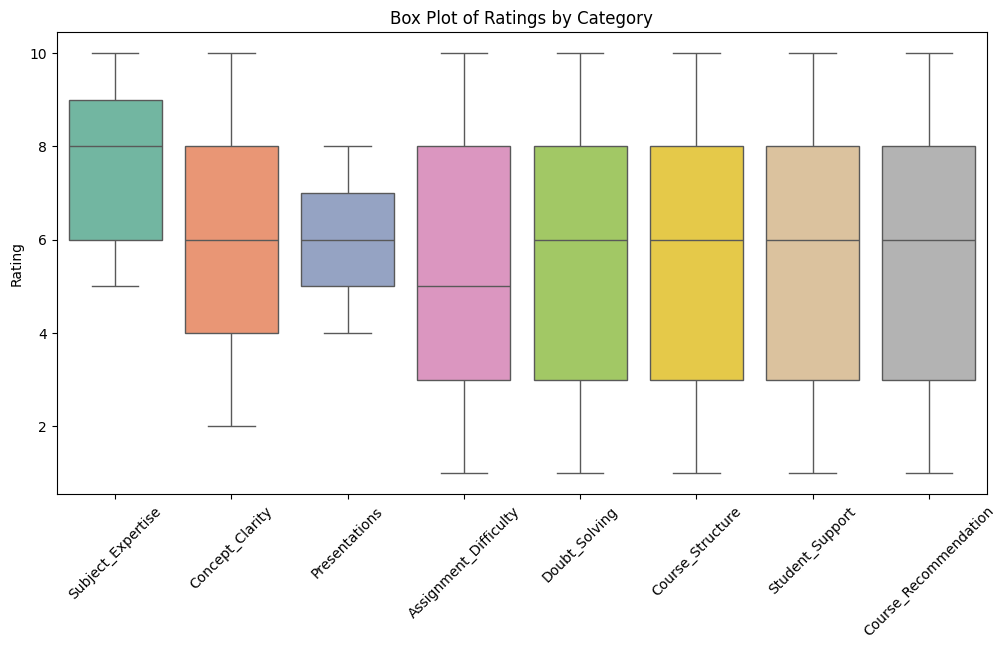

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.iloc[:, 1:], palette="Set2")
plt.xticks(rotation=45)
plt.title("Box Plot of Ratings by Category")
plt.ylabel("Rating")
plt.show()


## 🧊 Radar Chart (Spider Chart)
Goal: Compare multiple rating aspects for a single student or average group

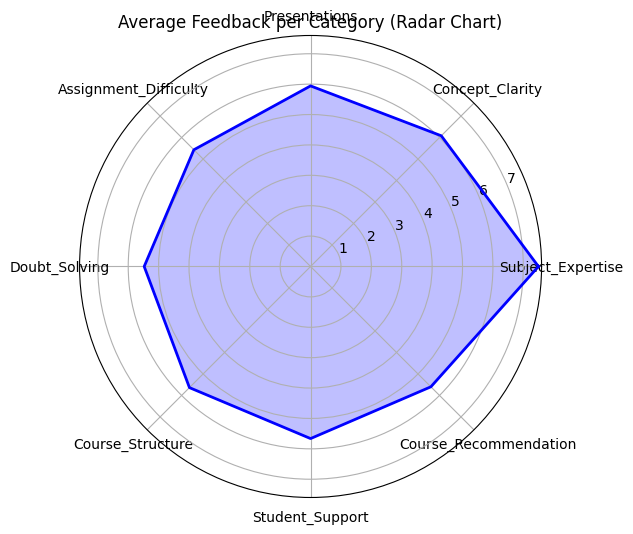

In [10]:
import numpy as np

categories = df.columns[1:]
values = df[categories].mean().tolist()

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='blue', linewidth=2)
ax.fill(angles, values, color='blue', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_title("Average Feedback per Category (Radar Chart)")
plt.show()


## 🔁 Pair Plot (Visual Correlation)
Goal: Show relationships between all rating features

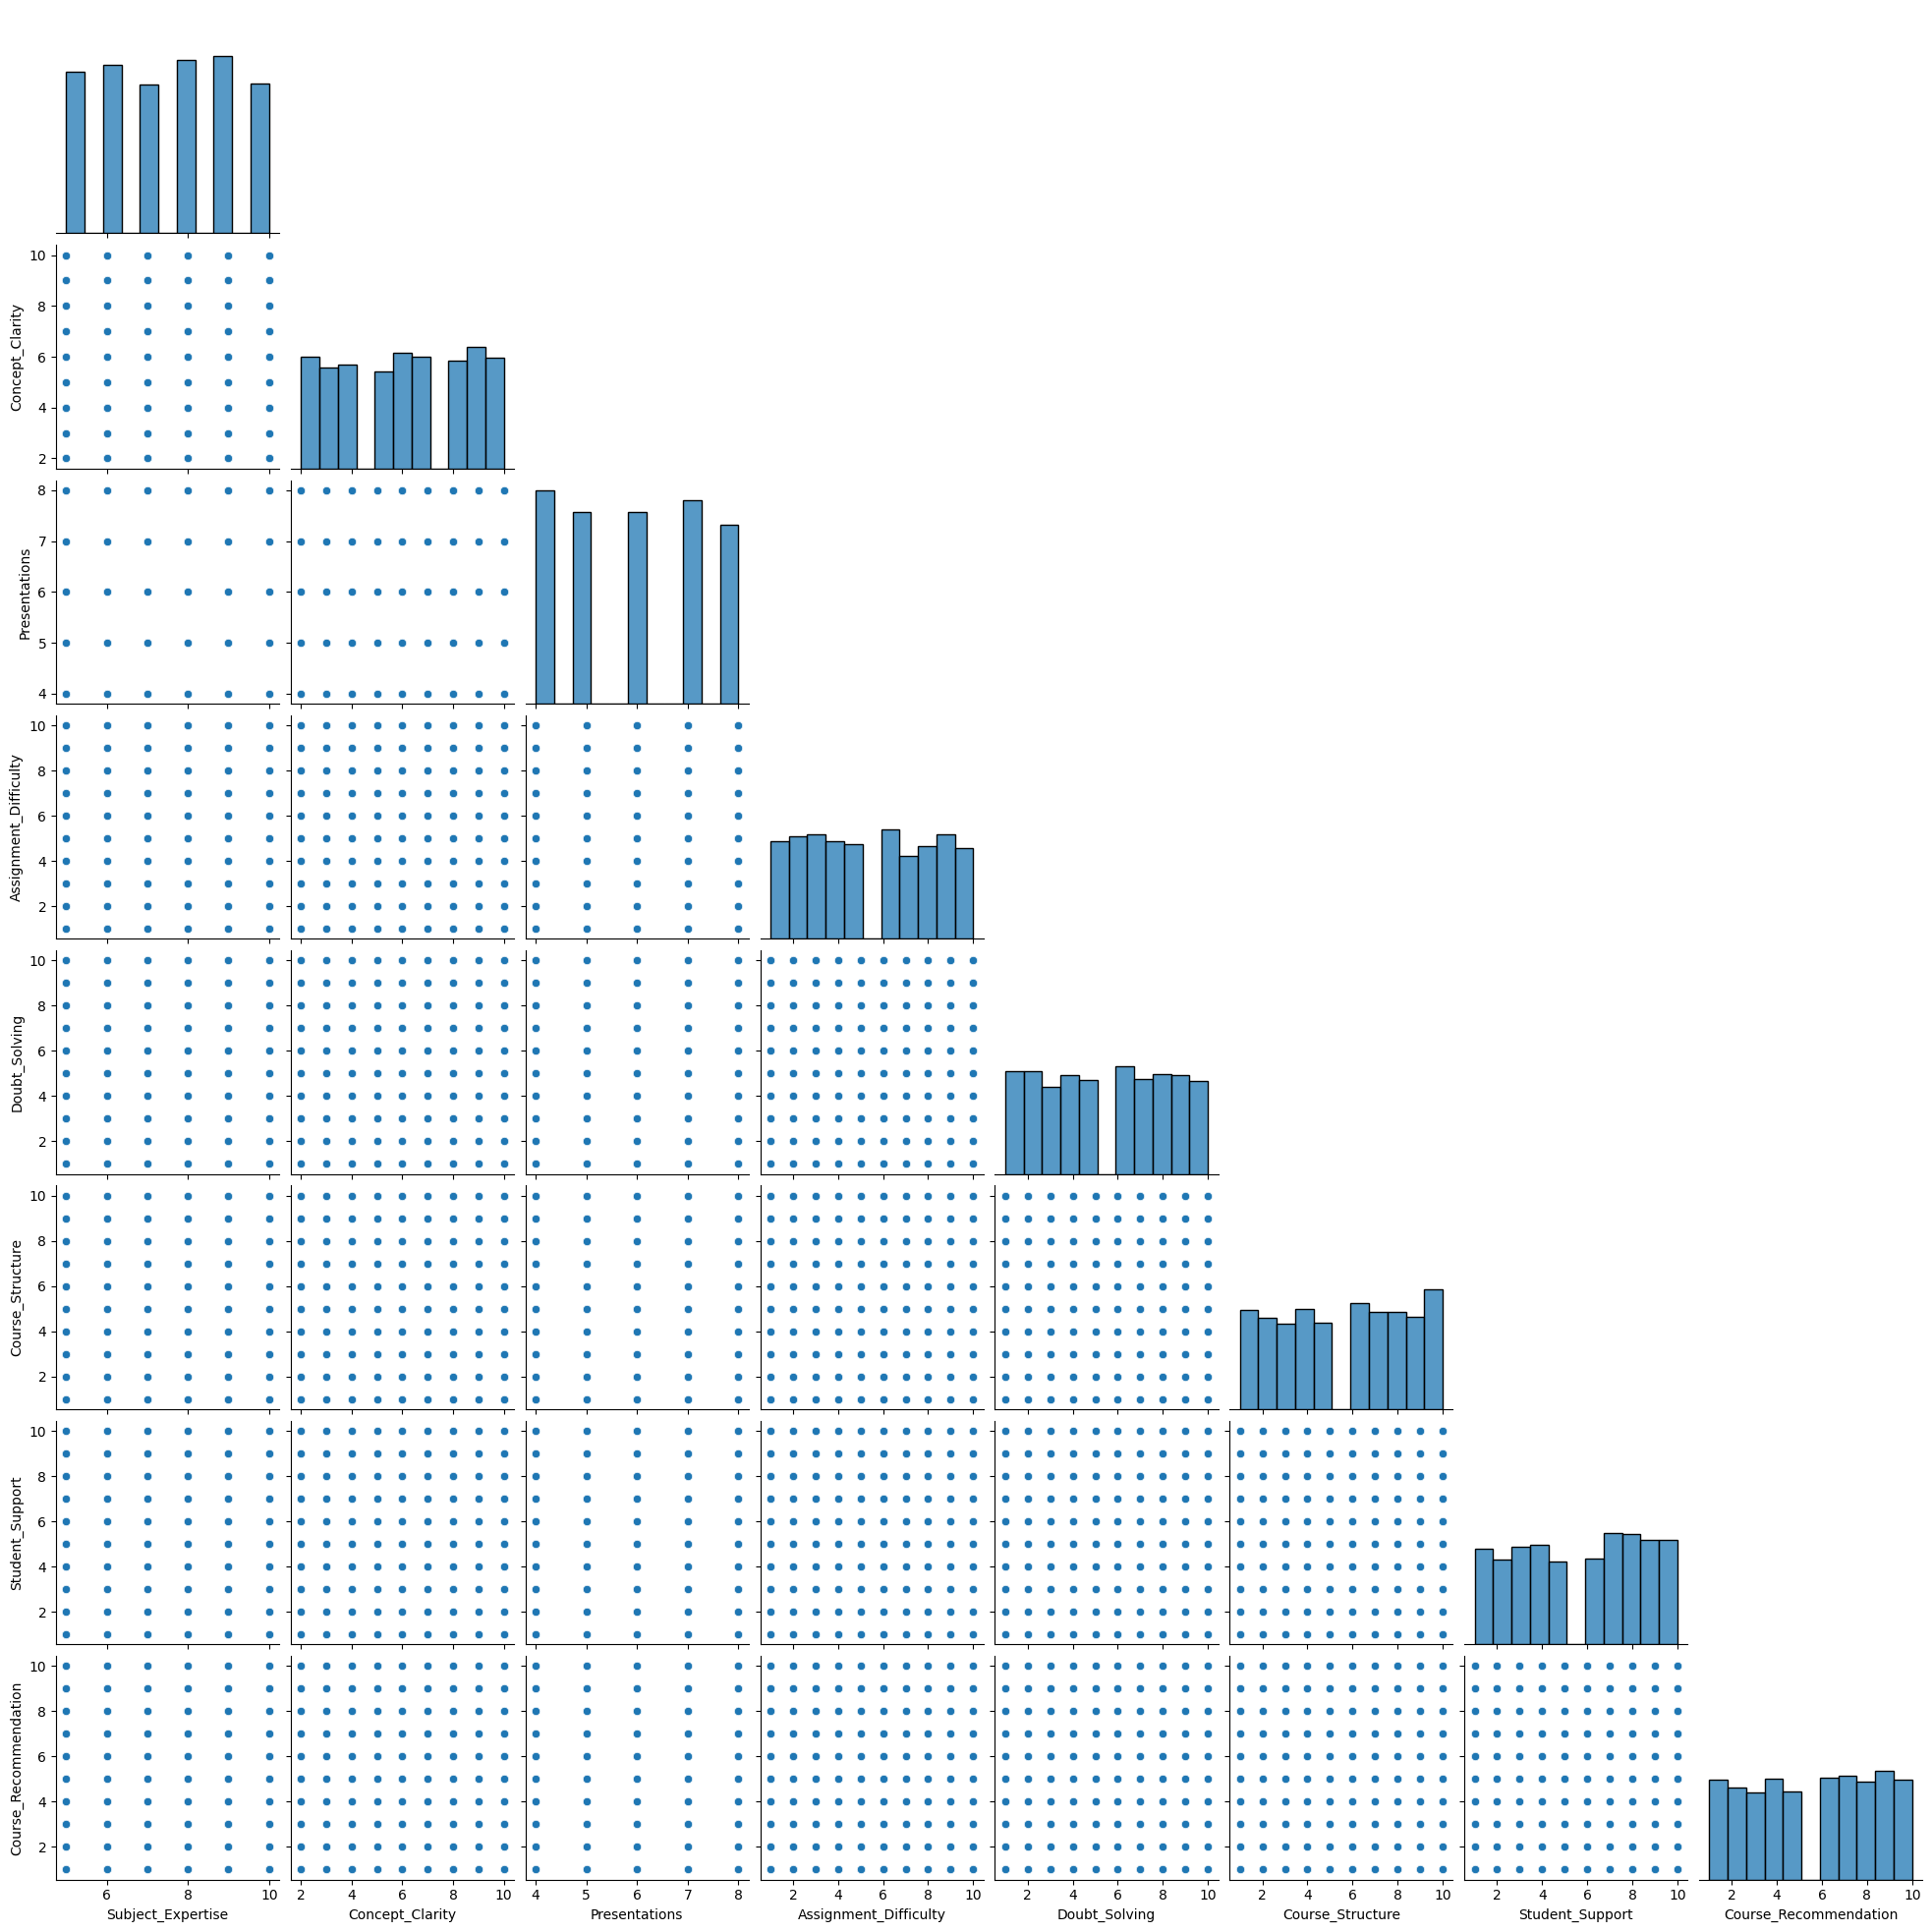

In [11]:
sns.pairplot(df.iloc[:, 1:], corner=True)


## 🧑‍🎓 Student-wise Heatmap
Goal: See how individual students responded across categories


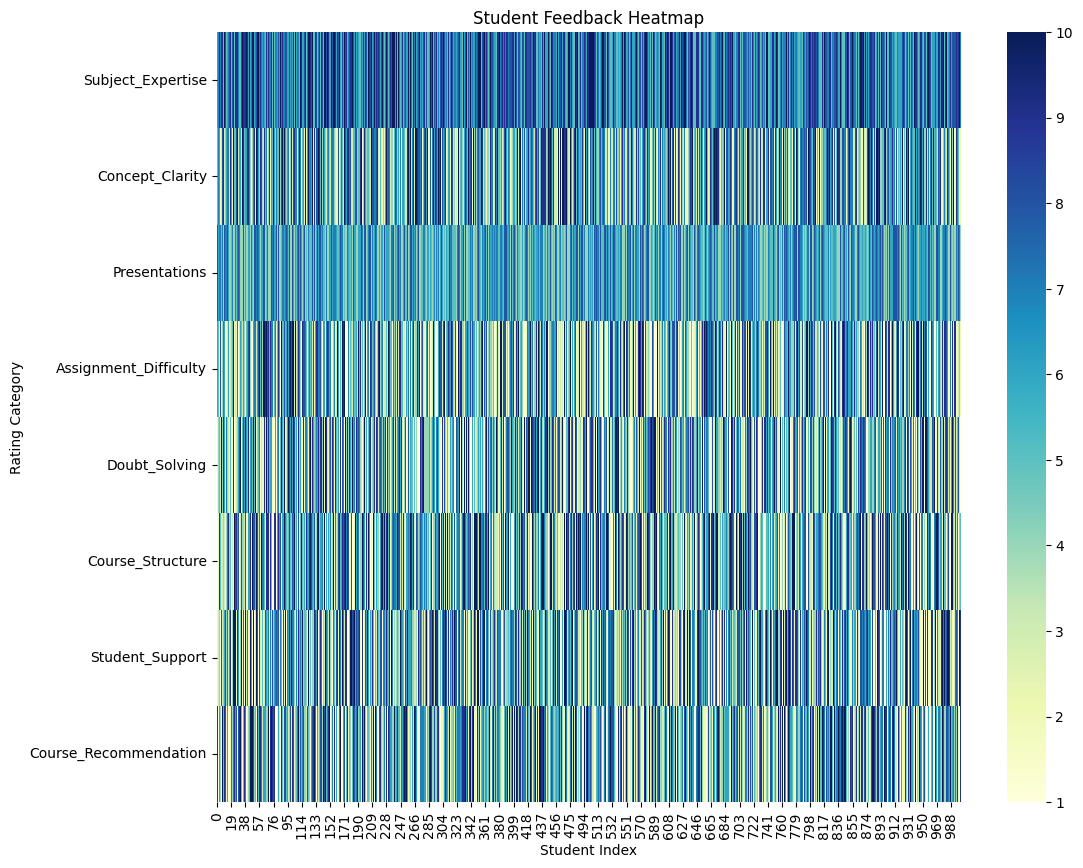

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.iloc[:, 1:].transpose(), cmap="YlGnBu", cbar=True)
plt.title("Student Feedback Heatmap")
plt.xlabel("Student Index")
plt.ylabel("Rating Category")
plt.show()



## 💡 Insights & Recommendations

- 📈 **Top-Rated Aspects:** These reflect what's working well — double down on them.
- ⚠️ **Lower-Rated Areas:** May require rethinking how content or support is delivered.
- 🤝 **Improve Student Support:** If support metrics are low, increase mentoring availability.
- 🧭 **Use Correlations:** If "Concept Clarity" and "Recommendation" are strongly linked, focus efforts there.
